# Exercise: A simple model of neuronal calcium dynamics
In the experiments you did with Kristian Lensjø, you probably saw images of neurons flashing (in green) when responding to certain visual stimuli. The interpretation of these experiments is that: (1) a flash indicated elevations in the intracellular calcium concentration, (2) the calcium elevation indicated that the neuron fired an action potential, and (3) the action potential indicated that the neuron received a sufficiently strong external input to drive it above firing its threshold. In this exercise, we will make a simple model that captures the relationship between the input, the action potential and the calcium dynamics in a neuron. We will use the good old Hodgkin-Huxley (HH) model for action potential generation as a starting point. A standard version of the HH-model is already implemented in the code below. In this exercise, you expand this model to also include a calcium channel and intracellular calcium dynamics. 

## The standard Hodgkin-Huxley model:
The standard HH-model is defined by the following set of differential equations:

\begin{eqnarray}
C\frac{dV}{dt} &=& I - \bar g_{K^+} n^4 (V - E_{K^+}) - \bar g_{Na^+} m^3 h(V - E_{Na^+} ) - g_L (V - E_L) \\ 
\frac{dn}{dt} &=& \frac{n_\infty (V) - n}{\tau_n (V)} \\
\frac{dm}{dt} &=& \frac{m_\infty (V) - m}{\tau_m(V)} \\
\frac{dh}{dt} &=&  \frac{h_\infty (V) - h}{\tau_h (V)}
\end{eqnarray}

It is convenient to rewrite the last three equations in the form

\begin{equation}
\frac{dx}{dt} = \alpha_x(V)(1 - x) - \beta_x (V )x  \qquad \mbox{where} \ x \in \{n, m, h\}.
\end{equation}

The coefficients $\alpha_x (V )$ and $\beta_x (V )$ represent the (voltage-dependent) activation and inactivation rates, respectively, for the gate $x$. With these coefficients, the steady-state activation variables $x_\infty(V )$ and the time constants $\tau_x(V )$ in the Hodgkin-Huxley equations are given by

\begin{equation}
x_\infty (V) = \frac{\alpha_x (V)}{\alpha_x (V) + \beta_x (V)} \qquad \mbox{and} \qquad
\tau_x (V ) = \frac 1{\alpha_x (V) + \beta_x(V)}.
\end{equation}

The code below uses a simple forward Euler method to run the Hodgkin-Huxley model (Box 1) when responding to a rectangular input-current pulse:

\begin{equation}
I(t) = \begin{cases} I_{\mbox{max}} & t_{\mbox{stim,on}} \le t \le t_{\mbox{stim,off}} \\ 0 & \mbox{else} \end{cases}
\end{equation}

and with the initial conditions

\begin{eqnarray}
V(0) &=& V_{\mbox{rest}}  \\
n(0) &=& n_\infty (V_{\mbox{rest}}) \\
m(0) &=& m_\infty (V_{\mbox{rest}}) \\
h(0) &=& h_\infty (V_{\mbox{rest}})\;.
\end{eqnarray}

Here, $V_{\mbox{rest}}$ denotes the resting potential of the neuron, i.e. the stationary membrane potential in the absence of any input $I$. The default parameters are given in Table 1. Note that these parameters are already implemented in the function `set\_parameters()`. You may run the code to check that it works as it should plot the input current $I(t)$ and the resulting membrane potential $V(t)$, and produce a response with two action potentials.

<img src="Table.png" width = "500">


## Problem 1: Speed up the Hodgkin-Huxley model
__(i)__  The HH-model was based on recordings from a squid giant axon in cold temperature. The activation/inactivation rates ($\alpha_x$ and $\beta_x$) under those circumstanses were quite slow compared to what they are in neurons that live inside a nice and warm brain. The first task is therefore to make the HH-model more _in vivo_-brain-like by speeding up all rates by a factor 2. That is, multiply all reaction rates by 2 and run a new simulation. Compare the response to that in the original HH-model.

__(ii)__ Just to get some insight in what the HH-model does, adjust the stimulus (strength and duration) to find the $f-I$ curve (firing rate as function of input current) of the modified HH-neuron. Note that for some 'subthreshold' currents, the HH-model responds by firing spikes for a while before becoming silent. Let this "unsustained" firing correspond to a zero firing rate. What is the threshold current for sustained firing for the speeded-up version of the HH-model?

P.s. Don't spend too much time on this. You could write an algoritm for counting spikes here, but it is sufficient to instead just run a short series of manual trials, count spikes, and plot a few data points to get the essential picture. 


## Problem 2: Add a calcium channel to the (speeded-up) model:
The HH-model has only two active ion channels, i.e., the Na+ and K+ channels responsible for generating action potentials. Most neurons have several additional ion channels. For example, many neurons have so called high-voltage-activated Ca2+ channels. As their name indicate, these open at high voltages, such as during an action potential, and and while they are open, Ca2+ rushes into the cell. It is the resulting increase in intracellular $[Ca^{2+}] that is recorded in Ca2+ imaging experiments.

__(i)__ Expand the (speeded-up) HH-model to include a simple model of a high-voltage-activated calcium channel with two activation gates ($s$). We will deal with the calcium dynamics later, but may here start by only modelling the current with the same kind of formalism that was used for the original two HH-channels (and follwing the same logic in the code): 

\begin{equation}
I_{Ca} = \bar g_{Ca^{2+}} s^2 (V - E_{Ca^{2+}}).
\end{equation}

Suitable functions for the activation/deactivation rates are:

\begin{equation}
\alpha_s = \frac{1.6}{1+\exp[-0.072\cdot(V_m+8)]} \\
\beta_s = \frac{0.02\cdot(V_m-8.3)}{\exp[(V_m-8.3)/5.6]-1}
\end{equation}

For the Ca2+ reversal potential you may use $E_{Ca^{2+}} = 120$ mV. For the conductance ($\bar g_{Ca^{2+}}$), see point (__ii__) below.

__(ii)__ The high-voltage-activated Ca2+ current is typically smaller than the Na+ and K+ currents, but it is sometimes big enough to affect the shape of the action potential, normally by prolonging its duration slightly. Try out some different values for the conductance $\bar g_{Ca^{2+}}$, and find a value that makes $I_{Ca}$ have a minor but visible (e.g., changes it duration by a few percent) impact on the action potential shape.


## Problem 3: Add calcium dynamics to the model:
Finally, we also want to model the Ca2+ dynamics of the model.

__(i)__ Introduce an additional state variable for the intracellular Ca2+ concentration $[Ca^{2+}]$. Expand the model by adding calcium dynamics modelled on the simple form:

\begin{equation}
\frac{d[Ca^{2+}]}{dt} = - k_{Ca} \cdot I_{Ca} + ([Ca^{2+}]_0-[Ca^{2+}])/\tau_{Ca}.
\end{equation}

Here, the first term represents Ca2+ entering through the calcium channel, and the second term is a simple exponential decay term that represents various processes that work to bring the Ca2+ concentration back to the resting concentration. For the resting (and initial) concentration, you may use $[Ca^{2+}]_0 = 50$ nM $= 5e-5$ mM. For the decay time constant, you may use $\tau_{Ca} = $ 50 ms. Finally, for the constant $k_{Ca}$, you may use $k_{Ca} = 1e-8$ cm$^2$mM/$\mu$A (units matched to give calcium change in mM/ms).

P.s. $k_{Ca}$ converts a transmembrane current density to a concentration change in the intracellular volume, and thus depends on the volume/surface ratio of the cell. However, the majority of the Ca2+ ions that cross the membrane are almost instantaneously buffered away by several biochemical reactions, and thus do not "show up" as free intracellular calcium. As $k_{Ca}$ summarizes several processes for which there often is little quantitative data, it is in models normally considered a "free parameter", and is tuned to a value that gives rise to realistic calcium fluctuations. The value suggested above works fine for the current model setup.

__(ii)__ Give the neuron a brief input pulse that makes it fire a single action potential. Plot the voltage and calcium response, and discuss it in the context of Kristian Lensjøs calcium imaging experiments.

__(iii)__ (If time) Depending on your choice of $g_{Ca}$, the calcium elevation during an action potential should be on the order of some tens to some hundreds of nM. If Kristian gave you any quantitative data on the actual calcium signal and magnitude, you may try to tune $k_{Ca}$, $\tau_{Ca}$ and $g_{Ca}$ to reproduce it. 

__(iv)__ (If time) Some neurons have very slow $\tau_{Ca}$ and can then use the intracellular $[Ca^{2+}]$-level as an "indicator" of their average firing rate. Explain how this can be possible, and illustrate it with simulations on the model.

In [2]:
%pylab notebook
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [1]:
def set_parameters():
    '''
    Define simulation, stimulus and neuron parameters and stores values in parameter dictionary p.

    Returns:
    --------
    p : dict
        Parameter dictionary.
      
    '''
    ## store parameters in dictionary
    p = {}
  
    ## simulation parameters
    p['T'] = 50.                ## simulation time (ms)
    p['dt'] = 0.025              ## simulation time resolution (ms)

    ## stimulus parameters
    p['I_amp'] = 10         ## input current amplitude (uA/cm2)
    p['t_stim_on'] = 5.            ## stimulus-on time (ms)
    p['t_stim_off'] = 30.           ## stimulus-off time (ms)

    ## neuron parameters
    p['V_rest'] = -65.             ## resting potential (mV)
    p['Cm'] = 1.               ## membrane capacitance (uF/cm2)
    p['gbar_Na'] = 120.             ## max. Na conductance (mS/cm2)
    p['gbar_K'] = 36.               ## max K conductance (mS/cm2)
    p['gbar_l'] = 0.3              ## leak conductance (mS/cm2)
    p['gbar_Ca'] = 0
    p['E_Na'] = 50.              ## Na reversal potential (mV)
    p['E_K'] = -77.             ## K reversal potential (mV)
    p['E_l'] = -54.387          ## Leak reversal potential (mV)
    
    ## voltage dependence of gate variables    
    ### K activation
    p['alpha_n'] = np.vectorize(lambda v: 0.01*(v+55.) / (1.-np.exp(-(v + 55.)/10.)) 
                                if v != -55. else 0.1) ## activation rate (1/ms)
    p['beta_n'] = lambda v: 0.125*np.exp(-(v+65.)/80.) ## inactivation rate (1/ms)
    
    ### Na activation
    p['alpha_m'] = np.vectorize(lambda v: 0.1*(v + 40.)/(1.-np.exp(-(v + 40.)/10.)) 
                                if v != -40. else 1)  ## activation rate (1/ms)
    p['beta_m'] = lambda v: 4.*np.exp(-(v+65.)/18.)   ## inactivation rate (1/ms)
    
    ### Na inactivation
    p['alpha_h'] = lambda v: 0.07*np.exp(-(v+65.)/20.)  ## activation rate (1/ms)
    p['beta_h'] = lambda v: 1./(1.+np.exp(-(v + 35.)/10.)) ## inactivation rate (1/ms)
    
    derived_parameters(p)  ## add derived parameters to dictionary (see below)

    ## HINT: Storing parameters in dictionaries simplifies function definitions by 
    ## reducing number of arguments (see below).
    
    return p

In [2]:
def derived_parameters(p):
    '''
    Set derived parameters, i.e. parameters which are fully defined by parameters in p.

    Parameters:
    -----------
    p: dict
       Parameter dictionary
     
    Returns:
    --------
    nothing (p is modified "on-the-fly").
    
    '''
    
    p['time'] = np.arange(0, p['T']+p['dt'], p['dt'])                          ## time array (ms)
    p['n_inf'] = lambda v: p['alpha_n'](v)/(p['alpha_n'](v) + p['beta_n'](v)) ## steady-state K activation
    p['tau_n'] = lambda v: 1./(p['alpha_n'](v) + p['beta_n'](v))              ## (ms)
    p['m_inf'] = lambda v: p['alpha_m'](v)/(p['alpha_m'](v) + p['beta_m'](v)) ## steady-state Na activation
    p['tau_m'] = lambda v: 1./(p['alpha_m'](v) + p['beta_m'](v))              ## (ms)
    p['h_inf'] = lambda v: p['alpha_h'](v)/(p['alpha_h'](v) + p['beta_h'](v)) ## steady-state Na inactivation
    p['tau_h'] = lambda v: 1./(p['alpha_h'](v) + p['beta_h'](v))              ## (ms)

In [3]:
def stimulus(p):
    '''
    Consctructs array I of input currents with

    I(t) = p['I_amp']        for p['t_stim_on'] <= t <= p['t_stim_off']
    I(t) = 0.0               else.

    (i.e. current pulse of length p['t_stim_off']-p['t_stim_on']).
    
    Parameters:
    -----------
    p: dict
       Parameter dictionary
     
    Returns:
    --------
    I: ndarray
       Array of input currents with with len(I)=len(p['time']).

    '''
  
    I = np.zeros(len(p['time']))

    ## step stimulus
    for i, t in enumerate(p['time']):
        if p['t_stim_on'] <= t <= p['t_stim_off']:
            I[i] = p['I_amp']

    return I

In [4]:
def update(Vm, Ca, m, h, n, I, p):
    '''
    Updates neuron state (Vm,m,h,n) from time step i-1 to time step i.

    Parameters:
    -----------
    Vm: float
        Membrane potentential at time step i-1.
     m: float
        Na activation at time step i-1.
     h: float
        Na inactivation at time step i-1.
     n: float
        K activation at time step i-1.
     I: float
        Input current at time step i-1.
     p: dict
        Parameter dictionary
    
    Returns:
    --------
    Vm: float
        Membrane potentential at time step i.
     m: float
        Na activation at time step i.
     h: float
        Na inactivation at time step i.    
     n: float
        K activation at time step i.
  
    '''
    
    g_Na = p['gbar_Na']*(m**3)*h
    g_K = p['gbar_K']*(n**4)      
    g_l = p['gbar_l']
    m += (p['alpha_m'](Vm)*(1 - m) - p['beta_m'](Vm)*m) * p['dt']
    h += (p['alpha_h'](Vm)*(1 - h) - p['beta_h'](Vm)*h) * p['dt']
    n += (p['alpha_n'](Vm)*(1 - n) - p['beta_n'](Vm)*n) * p['dt']
    
    INa = g_Na*(Vm - p['E_Na'])
    IK = g_K*(Vm - p['E_K'])
    IL = g_l*(Vm - p['E_l'])

    Vm += (I - INa - IK - IL)/p['Cm'] * p['dt']
    
    return Vm, Ca, m, h, n

In [5]:
def simulate(p):
    '''
    1) Initialises state variables Vm, m, h, n with respective values at resting potential p['V_rest'].
    2) Constructs and returns array I of input currents by calling stimulus().
    3) Constructs array Vm of membrane potentials by calling update() in each time step.

    Parameters:
    -----------
    p: dict
       Parameter dictionary
       
    Returns:
    --------
    Vm: ndarray
        Array of membrane potentials with len(Vm)=len(p['time']).
     I: ndarray
        Array of input currents with len(I)=len(p['time']).

    '''
  
    Vm = np.zeros(len(p['time']))  # initialise membrane-potential array (mV)
    Ca = np.zeros(len(p['time']))  # initialise membrane-potential array (mV)

    ## initial conditions
    Vm[0] = p['V_rest']
    
    m = p['m_inf'](p['V_rest'])
    h = p['h_inf'](p['V_rest'])
    n = p['n_inf'](p['V_rest'])
  
    I = stimulus(p) ## array of stimulus currents (uA/cm2)
  
    ## loop over time steps
    for i in range(1, len(p['time'])):
        Vm[i], Ca[i], m, h, n = update(Vm[i-1], Ca[i-1], m, h, n, I[i-1], p)
    return Vm, I

Main simulation:

<IPython.core.display.Javascript object>


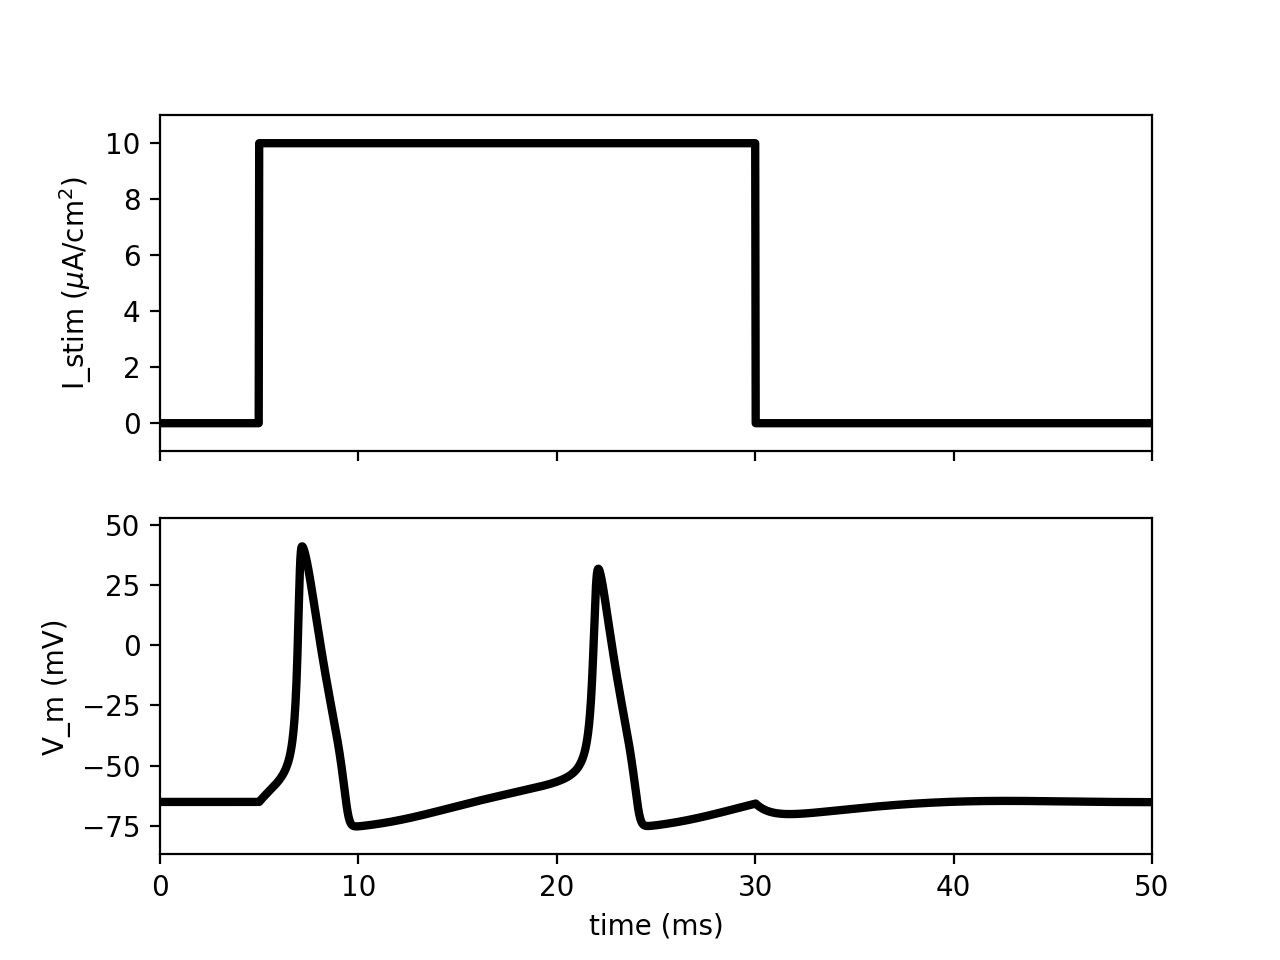

In [11]:
## set parameters
p = set_parameters()

## simulate
Vm, I = simulate(p)

## plot results
figure(1)
clf()

### input current
sp1 = subplot(211)
plot(p['time'], I, 'k-', lw=3)
ylabel('I_stim ($\mu$A/cm$^2$)')
xlim(p['time'][0], p['time'][-1])
offset = 0.1*np.abs(np.max(I)-np.min(I))
ylim(np.min(I)-offset, np.max(I)+offset)
#sp1.set_position([0.1, 0.65, 0.8, 0.3])
setp(gca(), xticklabels=[])

### membrane potential 
sp2 = subplot(212)
plot(p['time'], Vm, 'k-', lw=3)
ylabel('V_m (mV)')
xlabel('time (ms)')
xlim(p['time'][0], p['time'][-1])
offset = 0.1*np.abs(np.max(Vm)-np.min(Vm))
ylim(np.min(Vm)-offset, np.max(Vm)+offset)
#sp2.set_position([0.1, 0.1, 0.8, 0.5])

savefig('exercise_3_result.png')  ## saves figure as pdf file
